# Diabetes Data Train Test Split

## Imports and Setups

In [20]:
%load_ext autoreload
%autoreload 2

# This sets up the appropriate logging and path configs
from notebook_setup import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# External Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from src.visualization.visualize import plot_split_stratfied_distributions, save_split_stratfied_distributions_plot

## Import Diabetes Dataset

In [22]:
data = pd.read_csv('data/raw/diabetes_prediction_dataset.csv')
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [23]:
# Split by features and labels
X = data.loc[:, data.columns != 'diabetes']
y = data.loc[:, data.columns == 'diabetes']

## Split 
Stratify by: [gender, age, diabetes]

### Stratify Demographics
Lets see if we have enough to stratify by

In [32]:
data.shape

(100000, 9)

In [33]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [24]:
data["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [25]:
data["age"].value_counts().min()

36

In [26]:
data["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
    stratify=data[["gender", "diabetes"]])

### Confirm Stratified Split By Eye

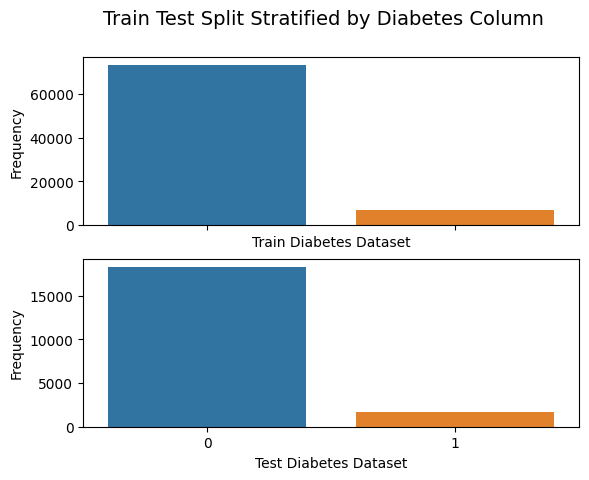

In [28]:
save_split_stratfied_distributions_plot(y_train, y_test, "diabetes", "reports/train_test_split/split_strat_by_diabetes.png")

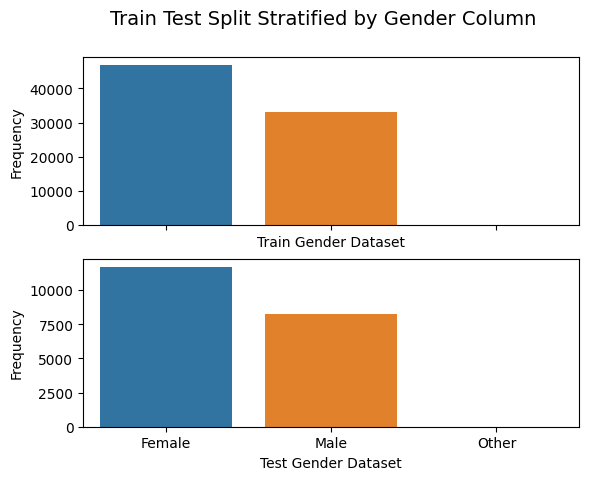

In [29]:
save_split_stratfied_distributions_plot(X_train, X_test, "gender", "reports/train_test_split/split_strat_by_gender.png")

## Output as CSV

In [30]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [31]:
df_train.to_csv("data/interim/train.csv")
df_test.to_csv("data/interim/test.csv")